# COMP47670 : Data Science In Python
# Assignment 1: Data Collection & Preparation

Name(s):Jatin Jaitley

Student Number(s):18200075

# Import Statements

In [1]:
import re
import csv
import tweepy
import json
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from tweepy.auth import OAuthHandler
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Task 1 : Identify Suitable API

API: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object 

**We will be using twitter for sentiment analysis and comparision between the two best players ever played the game of football**

**We will be using tweepy which is an api wrapper to obtain tweets**


In [3]:
#Initializing the keys
consumer_key ='9d0KWvb4v4wc3XPliFbuT9Tje'
consumer_secret ='BdwGrkL0jyWNecNqnTEJUfQzrq0Ahya91cYX01QH0sXH1LzEsb'
access_token ='177558897-7q8gdaRktZSK2YQyL74ai24w8OHlOUN56wwfCpJb'
access_secret ='al7K29BmxS70b6pI59PkriFvnFuPbQBd5IV6LIHB4wXSA'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)       # Passing consumer key and secret
auth.set_access_token(access_token, access_secret)              # Passing access tokens
api = tweepy.API(auth)                                          # Authenticating the tokens and creating API object

# Task 2 : Collect Data From Chosen API

**We will be collecting data and also storing the same in dataframe directly**


Raw Json Data

In [0]:
api.search("CR7" , count=1,full_text=True, wait_on_rate_limit=True)

[Status(_api=<tweepy.api.API object at 0x7f666f5586a0>, _json={'created_at': 'Mon Mar 25 19:27:23 +0000 2019', 'id': 1110261919066345473, 'id_str': '1110261919066345473', 'text': '@faisal_itt1 @mr_shenko رايح الامارات لو الملعب النص بنص يمكن بس ٧٠ بالميه لهم', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'faisal_itt1', 'name': 'zaza', 'id': 1080944157538111489, 'id_str': '1080944157538111489', 'indices': [0, 12]}, {'screen_name': 'mr_shenko', 'name': 'طلال العتيبي', 'id': 325142390, 'id_str': '325142390', 'indices': [13, 23]}], 'urls': []}, 'metadata': {'iso_language_code': 'ar', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1110259514715062273, 'in_reply_to_status_id_str': '1110259514715062273', 'in_reply_to_user_id': 1080944157538111489, 'in_reply_to_user_id_str': '1080944157538111489', 'in_reply_to_screen_name': 'faisal_itt1', 'use

In [0]:
messi_df = pd.DataFrame()# to store details obtained from twitter about messi
ronnie_df = pd.DataFrame()# to store details obtained from twitter about ronaldo
messivsronnie = ["CR7 OR Ronaldo","LM10 OR Messi"]#query to search

In [0]:
for player in messivsronnie:
  id_ = 0
  top_df = pd.DataFrame()
  for all_tweets in range(450):
      query_result =api.search(player , count=100, max_id=str(id_ - 1),full_text=True, wait_on_rate_limit=True)
      for tweet in query_result:
            temp_df = pd.DataFrame()
            id_ = tweet.id                                    # parsing unique id of tweet
            text = tweet.text                                 # parsing text
            favorite_count = tweet.favorite_count             # parsing favourite_count
            verified = tweet.user.verified                    # parsing statuses_count
            statuses_count = tweet.user.statuses_count        # parsing followers_count
            followers_count = tweet.user.followers_count      # parsing favourited 
            favorited = tweet.favorited                       # parsing favorited
            retweet_count = tweet.retweet_count               # parsing retweet_count
            lang = tweet.lang                                 # parsing language code of tweet
            retweeted = tweet.retweeted                       # parsing reweeted tweet True/False
            time_zone = tweet.user.time_zone                  # parsing user's time zone
            location = tweet.user.location                    # parsing location of user
            u_lang = tweet.user.lang                          # parsing user's language code
            hashtags = None
            if(len(tweet.entities["hashtags"]) != 0):                # block used to find hashtags of the tweets
                if( tweet.entities["hashtags"][0]["text"] != "") :
                    hashtags = tweet.entities["hashtags"][0]["text"]   # store the hastags associted with tweet

            temp_df["favorite_count"] = pd.Series(favorite_count)   # saving all  attributes in temporary Dataframe
            temp_df["favorited"] = pd.Series(favorited)
            temp_df["retweet_count"] = pd.Series(retweet_count)
            temp_df["lang"] = pd.Series(lang)
            temp_df["u_lang"] = pd.Series(u_lang)
            temp_df["followers_count"] = pd.Series(followers_count)
            temp_df["verified"] = pd.Series(verified)
            temp_df["statuses_count"] = pd.Series(statuses_count)
            temp_df["retweeted"] = pd.Series(retweeted)
            temp_df["time_zone"] = pd.Series(time_zone)
            temp_df["location"] = pd.Series(location)
            temp_df["hashtags"] = pd.Series(hashtags)
            temp_df["text"] = pd.Series(text)

            top_df = pd.concat([top_df, temp_df], ignore_index =True, axis = 0)         # concating the result of temp dataframe
      if(player == "CR7 OR Ronaldo"):
        ronnie_df = top_df
      elif (player == "LM10 OR Messi"):
        messi_df = top_df
      
    

In [4]:
messi = api.get_user('@TeamMessi').followers_count #obtaining followers of official messi account
ronaldo = api.get_user('@Cristiano').followers_count #obtaining followers of official ronaldo account





# Task 3 : Parsing and Storage of data

**We have already parsed the data in task 2 and will store the same in csv files**

In [0]:
ronnie_df.shape

(35710, 13)

In [0]:
messi_df.shape

(38018, 13)

**Below is the code to write Messi & Ronaldo data from dataframe in their respective csv's**

In [0]:
ronnie_df.to_csv("Ronaldo.csv",encoding='utf-8',quoting=csv.QUOTE_NONNUMERIC,index = False)

In [0]:
messi_df.to_csv("Messi.csv", encoding='utf-8',quoting=csv.QUOTE_NONNUMERIC,index = False)

# Task 4 :  Loading and Representing the data. Applying  pre-processing steps to clean/filter/combine the data

We will be preprocessing the data in the following steps


1.   We  will remove certain columns like location which we will not be using for analysis 
2.   We will preprocess the tweets removing usernames and emojis

**NOTE = We are sampling the data and considering 25000 datapoints from messi and ronaldo respectively **



In [5]:
cr7_df = pd.read_csv('Ronaldo.csv') #loading data from csv

In [6]:
cr7_df.shape

(35710, 13)

In [7]:
lm10_df = pd.read_csv('Messi.csv') #loading data from csv

In [8]:
lm10_df.shape

(38018, 13)

In [9]:
cr7_df = cr7_df[:25000]    #taking 25000 datapoints for Ronaldo
cr7_df.shape

(25000, 13)

In [10]:
lm10_df = lm10_df[:25000]      #taking 25000 datapoints for Messi
lm10_df.shape

(25000, 13)

In [11]:
#adding tweet length column to the dataframe. This part of our analysis step
cr7_df['tweet_length'] = cr7_df.text.str.len() 
lm10_df['tweet_length'] = lm10_df.text.str.len()

In [12]:
cr7_df = cr7_df.loc[:][[ 'retweet_count', 'lang', 'u_lang', 'text' , "favorite_count","followers_count","tweet_length"]] 

In [13]:
lm10_df = lm10_df.loc[:][[ 'retweet_count', 'lang', 'u_lang', 'text' , "favorite_count","followers_count","tweet_length"]] 

In [14]:
#removing @username from tweets numeric and reteet 'RT' test from tweet text
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|RT', ' ', tweet).split())
#creating new column for processed tweet
cr7_df['processed_tweet'] = cr7_df['text'].apply(lambda x: clean_tweet(x))
lm10_df['processed_tweet'] = lm10_df['text'].apply(lambda x: clean_tweet(x))

In [15]:
#adding tweet length processed column to the dataframe
cr7_df['tweet_length_processed'] = cr7_df.processed_tweet.str.len() 
lm10_df['tweet_length_processed'] = lm10_df.processed_tweet.str.len()

In [16]:
#Considering tweets in english language for sentiment comparision thereby filtering tweets which are in english
cr7_en_df = cr7_df[cr7_df["lang"] == "en"]
lm10_en_df = lm10_df[lm10_df["lang"] == "en"]

In [17]:
#checking the size of our dataframe for tweets in english language
display(cr7_en_df.shape)
display(lm10_en_df.shape)

(8846, 9)

(8211, 9)

In [18]:
#function to identify sentiment of tweets
def tweet_sentiment(tweet):
    sentiment_detect = TextBlob(tweet)
    if sentiment_detect.sentiment.polarity > 0:
        return 'Positive'
    elif sentiment_detect.sentiment.polarity <0:
        return 'Negative'
    else:
        return 'Neutral'
# function to find and return the polarity of the tweet 
def polarity(x): 
    analysis = TextBlob(x)
    return analysis.sentiment.polarity

In [19]:
#adding a new column storing sentiment of tweets
cr7_en_df['analysed_sentiment'] = cr7_en_df['processed_tweet'].apply(lambda x: tweet_sentiment(x))
lm10_en_df['analysed_sentiment'] = lm10_en_df['processed_tweet'].apply(lambda x: tweet_sentiment(x))

In [20]:
#adding column Polarity to store the sentiment value for tweets
cr7_en_df['Polarity'] = cr7_en_df['processed_tweet'].apply(lambda x: polarity(x))
lm10_en_df['Polarity'] = lm10_en_df['processed_tweet'].apply(lambda x: polarity(x))

# Task 5: Analyse and summarise the cleaned dataset

**Descriptive Analysis**

In [21]:
#displaying basic statistical data for Ronaldo & Messi
display(cr7_df.select_dtypes(include=[np.number]).describe())
display(cr7_df.select_dtypes(include=[np.object]).describe())
display(lm10_df.select_dtypes(include=[np.number]).describe())
display(lm10_df.select_dtypes(include=[np.object]).describe())

,retweet_count,favorite_count,followers_count,tweet_length,tweet_length_processed
count,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.00000
mean,740.553520,2.091880,9.840968e+03,110.536800,75.70672
std,6023.253716,41.180596,1.821227e+05,40.506093,42.59124
min,0.000000,0.000000,0.000000e+00,1.000000,0.00000
25%,0.000000,0.000000,1.140000e+02,81.000000,39.00000
50%,9.000000,0.000000,3.570000e+02,139.000000,93.00000
75%,522.000000,0.000000,1.107000e+03,140.000000,113.00000
max,508295.000000,4002.000000,1.500471e+07,192.000000,169.00000


,lang,u_lang,text,processed_tweet
count,25000,25000,25000,25000
unique,43,39,13432,9693
top,en,en,"RT @CR7Brasil: ""Onde está CR7?""\n""A contrataçã...",
freq,8846,12148,885,1433


,retweet_count,favorite_count,followers_count,tweet_length,tweet_length_processed
count,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000
mean,397.514720,1.547880,9.115436e+03,117.260040,84.759200
std,1316.790063,27.541593,1.635934e+05,32.563572,34.378114
min,0.000000,0.000000,0.000000e+00,5.000000,0.000000
25%,0.000000,0.000000,1.030000e+02,97.000000,60.000000
50%,37.000000,0.000000,3.070000e+02,139.000000,93.000000
75%,336.000000,0.000000,8.402500e+02,140.000000,114.000000
max,64411.000000,2299.000000,7.106198e+06,176.000000,138.000000


,lang,u_lang,text,processed_tweet
count,25000,25000,25000,25000
unique,35,39,11310,10352
top,es,en,RT @David_Heras: Messi contra Venezuela. No de...,Heras Messi contra Venezuela No dej de intenta...
freq,10649,9907,1201,1201


**Comparing followers count of official account of ronaldo and messi**

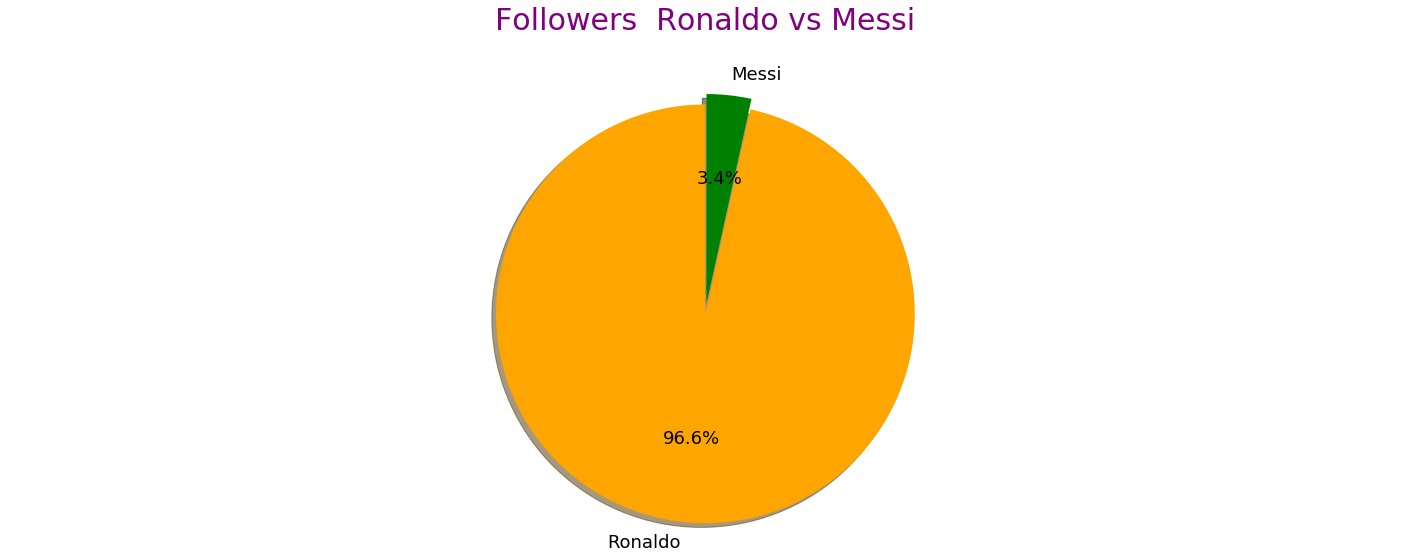

In [22]:
# Using matplotlib to draw a comparison between the followers of Ronaldo and Messi 
labels = ["Ronaldo", "Messi"]


matplotlib.rcParams['font.size'] = 20.0
explode = (0.0, 0.05) 

#using subplots
fig, (ax1) = plt.subplots(1, 1 , figsize=(20,7))
fig.suptitle("Followers  Ronaldo vs Messi", fontsize=30, color="Purple", y = 1.1)

#making pie chart for comparison 
ax1.pie([ronaldo, messi],colors = ['orange', 'green'], explode=explode, labels=labels,textprops={'fontsize': 18}, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.tight_layout()
plt.show()

**Analysis - ** 
Ronaldo has more followers when compared to Messi. This shows the popularity of Ronaldo in social media



**Tweets Based On Language**

**In this step we will be comparing number of tweets done from different languages.**

**Codes for the langusge is written below**

en->english

es->spanish

pt->portuguese

ar->arabic

it->italian

fr-> french

in-> indonesian

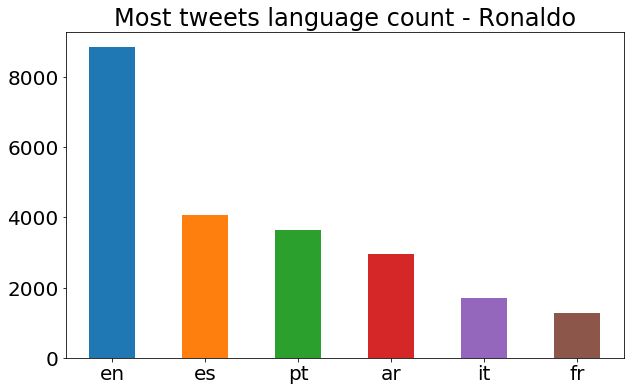

In [23]:
cr7_df["lang"].value_counts().head(6).plot.bar(title = "Most tweets language count - Ronaldo",figsize=(10,6),fontsize = 20, rot = 0)
plt.show()

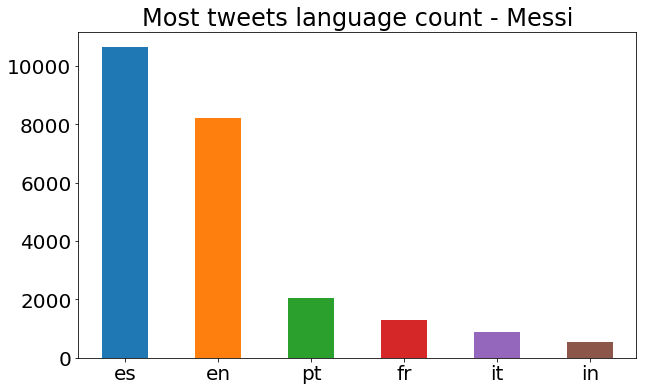

In [24]:
lm10_df["lang"].value_counts().head(6).plot.bar(title = "Most tweets language count - Messi",figsize=(10,6),fontsize = 20, rot = 0)
plt.show()

**Analysis**


1.   Ronaldo has popularity in the english speakers when compared to other language speakers
2.   Messi has more popularity with spanish speakers when compared to Ronaldo



In [25]:
#function to display the length of the tweet in the form of histogram 
def show_lengths_histogram(df, lang, player,langcode):
  df = df[df["lang"] == langcode]
  plt.figure(figsize=(15,5))
  sns.distplot(df["tweet_length"], color="dodgerblue", bins=30)
  plt.title(lang + " tweets length distribution" + player)
  plt.xlabel("Length")
  sns.despine()
  plt.ylabel("Number of tweets")
  

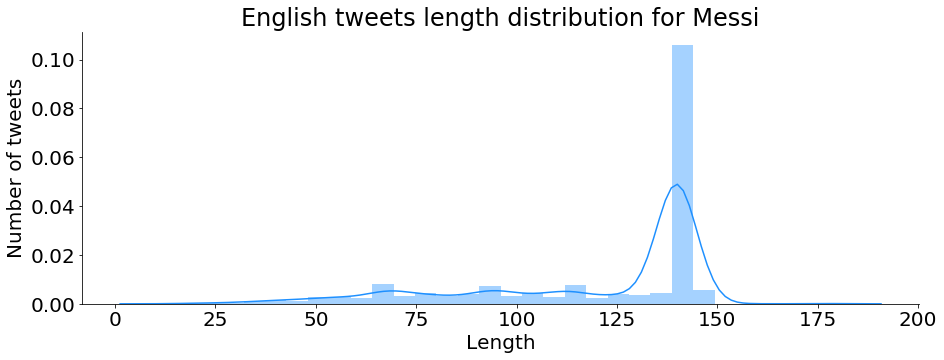

In [26]:
#function call for English language tweet length for messi
show_lengths_histogram(lm10_df, "English", " for Messi","en")

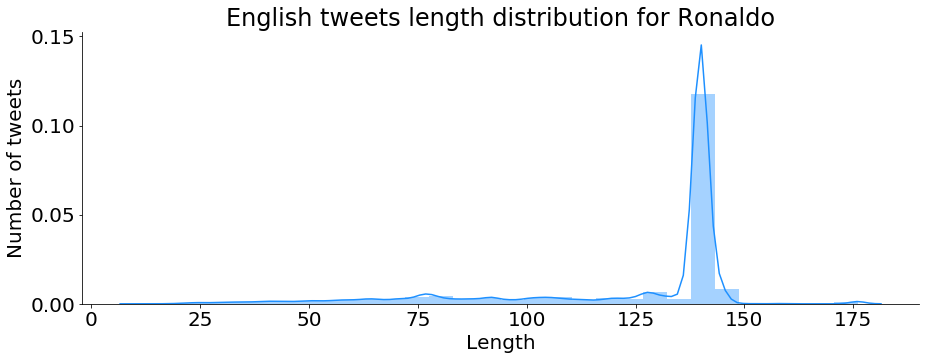

In [27]:
#function call for English language tweet length for Ronaldo
show_lengths_histogram(cr7_df, "English", " for Ronaldo","en")

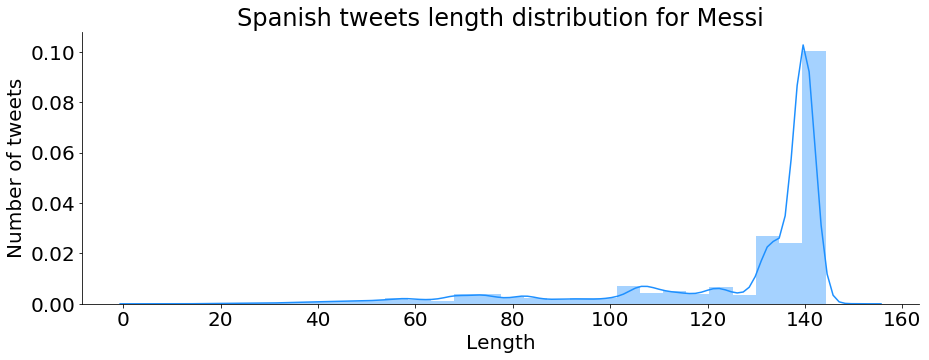

In [28]:
#function call for Spanish language tweet length for messi
show_lengths_histogram(lm10_df, "Spanish", " for Messi","es")

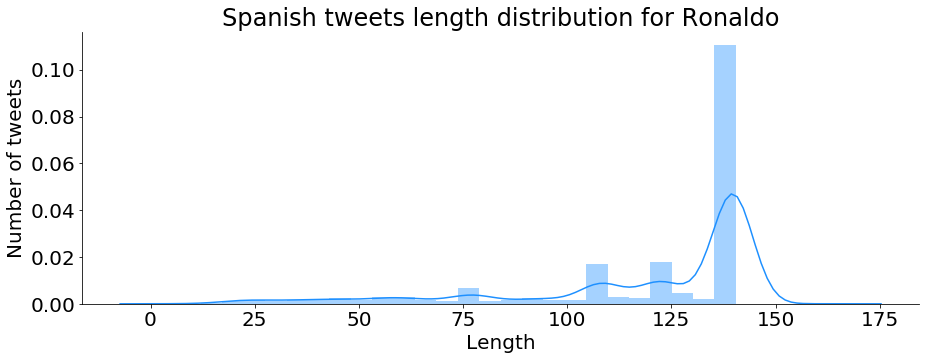

In [29]:
#function call for Spanish language tweet length for Ronaldo
show_lengths_histogram(cr7_df, "Spanish", " for Ronaldo","es")

**Analysis - We can observe that none of the abouve graphs follow a gaussian distribution this shows the variability in tweet length is quite high for both messi and ronaldo**

**Comparing favourite and retweets**

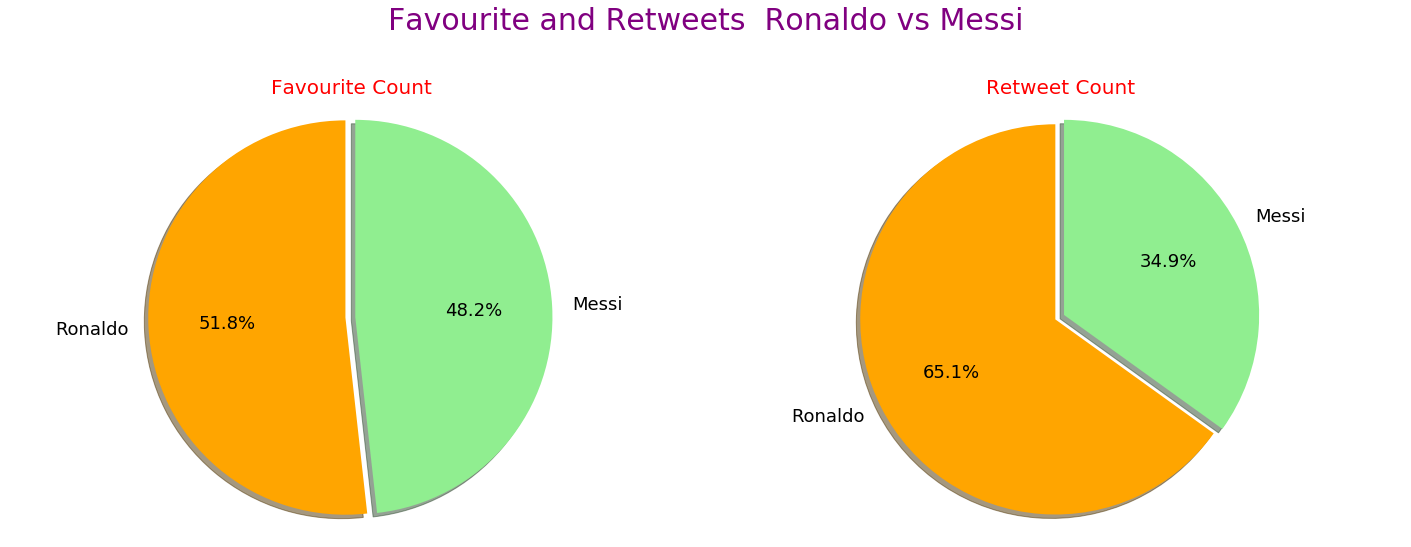

In [30]:
cr7_df_fav = cr7_df.loc[cr7_df["favorite_count"] >0]["favorite_count"].count()
lm10_df_fav = lm10_df.loc[lm10_df["favorite_count"] >0]["favorite_count"].count()

cr7_df_ret = cr7_df.loc[cr7_df["retweet_count"] != 0, 'retweet_count'].sum()
lm10_df__ret = lm10_df.loc[lm10_df["retweet_count"] != 0, 'retweet_count'].sum()

labels = ["Ronaldo", "Messi"]


matplotlib.rcParams['font.size'] = 20.0
explode = (0.0, 0.05) 

fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,7))
fig.suptitle("Favourite and Retweets  Ronaldo vs Messi", fontsize=30, color="Purple", y = 1.1)

ax1.pie([cr7_df_fav, lm10_df_fav], explode=explode,colors = ['orange', 'lightgreen'],textprops={'fontsize': 18}, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Favourite Count",color = "Red",fontsize=20)
ax1.axis('equal')  

ax2.pie([cr7_df_ret,lm10_df__ret], explode=explode,colors = ['orange', 'lightgreen'],textprops={'fontsize': 18},  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title("Retweet Count",color = "Red",fontsize=20)
ax2.axis('equal')  

plt.tight_layout()
plt.show()

**Analysis**

1.   Ronaldo related tweets have higher favourite count  by a small margin of 3.6%
2.   Ronaldo related tweets are more retweeted then Messi tweets



**Analysis Based on Sentiment**

In [31]:
#displying statistics at sentiment level 
display(cr7_en_df.select_dtypes(include=[np.number]).describe())
display(cr7_en_df.select_dtypes(include=[np.object]).describe())
display(lm10_en_df.select_dtypes(include=[np.number]).describe())
display(lm10_en_df.select_dtypes(include=[np.object]).describe())

,retweet_count,favorite_count,followers_count,tweet_length,tweet_length_processed,Polarity
count,8846.000000,8846.000000,8.846000e+03,8846.000000,8846.000000,8846.000000
mean,684.669681,2.225526,4.186201e+03,125.435677,95.578680,0.140753
std,2196.942681,47.729778,4.415428e+04,28.151823,28.855408,0.298115
min,0.000000,0.000000,0.000000e+00,12.000000,0.000000,-1.000000
25%,0.000000,0.000000,1.722500e+02,126.000000,80.000000,0.000000
50%,34.000000,0.000000,4.885000e+02,140.000000,106.000000,0.100000
75%,522.000000,0.000000,1.322500e+03,140.000000,116.000000,0.250000
max,63798.000000,4002.000000,2.775118e+06,176.000000,138.000000,1.000000


,lang,u_lang,text,processed_tweet,analysed_sentiment
count,8846,8846,8846,8846,8846
unique,1,32,3992,3785,3
top,en,en,RT @DevilsOfUnited: Throwback to this absolute...,Throwback to this absolute classic Commentator...,Positive
freq,8846,7955,821,821,4627


,retweet_count,favorite_count,followers_count,tweet_length,tweet_length_processed,Polarity
count,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000
mean,337.017172,1.472537,2415.803313,120.145536,89.555353,0.177921
std,1657.050576,14.950314,18140.964506,30.141916,32.548627,0.333487
min,0.000000,0.000000,0.000000,16.000000,0.000000,-1.000000
25%,0.000000,0.000000,139.000000,102.000000,63.000000,0.000000
50%,43.000000,0.000000,452.000000,139.000000,100.000000,0.000000
75%,284.000000,0.000000,1271.000000,140.000000,119.000000,0.450000
max,64411.000000,591.000000,796079.000000,176.000000,138.000000,1.000000


,lang,u_lang,text,processed_tweet,analysed_sentiment
count,8211,8211,8211,8211,8211
unique,1,34,3400,3213,3
top,en,en,RT @MoRosement: Have a bit of time so I wanted...,Have a bit of time so I wanted to expand on wh...,Positive
freq,8211,7177,404,404,4079


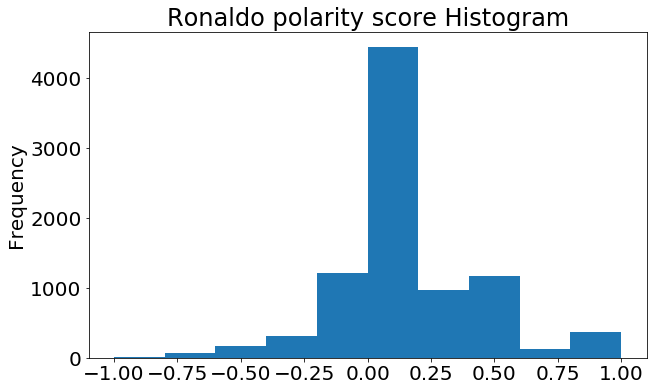

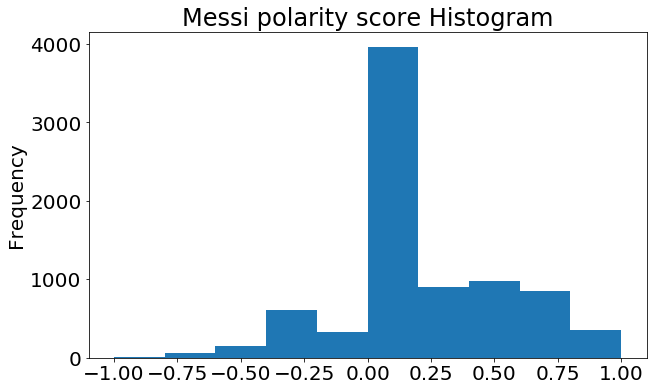

In [32]:
#function call to get the polarity score for Ronaldo
cr7_en_df["Polarity"].plot.hist(title = "Ronaldo polarity score Histogram" , figsize=(10,6))
plt.show()

#function call to get the polarity score for Messi
lm10_en_df["Polarity"].plot.hist(title = "Messi polarity score Histogram" , figsize=(10,6))
plt.show()

**Wordcloud Analysis**

In [33]:
# funcation to generate wordcloud
def tweet_wordcloud(df,col,input_file_name):
    text = df[col].values
    twitter_mask = np.array(Image.open(input_file_name))
    wc = WordCloud(width = 3000,height = 2000,background_color="white",max_font_size=90,mask=twitter_mask,
               stopwords=STOPWORDS.add("RT"), contour_width=3,contour_color='firebrick',random_state=42)
    # Generate a wordcloud
    wc.generate(str(text))
    # show
    plt.figure(figsize=[7,7])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

**Sentiment wise wordcloud for Messi**

-------------Positive tweets wordcloud Messi---------------------- 




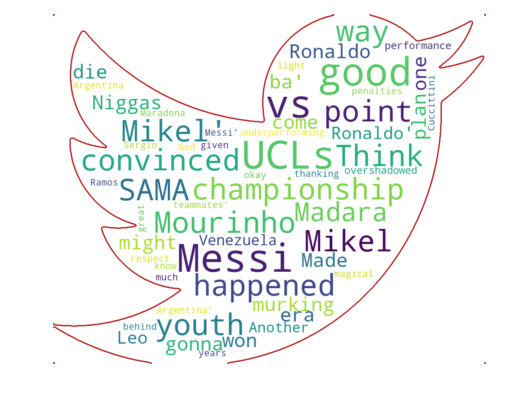

-------------Neutral tweets wordcloud Messi---------------------- 




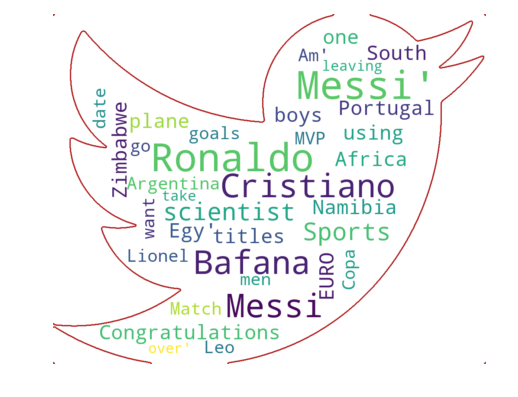

-------------Negative tweets wordcloud Messi---------------------- 




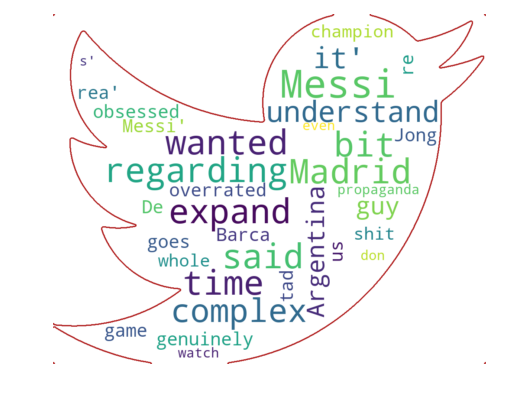

In [34]:
print("-------------Positive tweets wordcloud Messi---------------------- \n\n")
#taking the positive sentiments of messi
positive_messi_wc = lm10_en_df[lm10_en_df["analysed_sentiment"] == 'Positive']
#calling the function to make wordcloud
tweet_wordcloud(positive_messi_wc,"processed_tweet",'twitter_mask.png')


print("-------------Neutral tweets wordcloud Messi---------------------- \n\n")
#taking the neutral sentiments messi
neutral_messi_wc = lm10_en_df[lm10_en_df["analysed_sentiment"] == 'Neutral']
#calling the function to make wordcloud
tweet_wordcloud(neutral_messi_wc,"processed_tweet",'twitter_mask.png')

print("-------------Negative tweets wordcloud Messi---------------------- \n\n")

#taking the negative sentiments messi
negative_messi_wc = lm10_en_df[lm10_en_df["analysed_sentiment"] == 'Negative']
#calling the function to make wordcloud
tweet_wordcloud(negative_messi_wc,"processed_tweet",'twitter_mask.png')

**Analysis**


1.   In positive word cloud words like GOD, good, championship, congratulations, goals, UCL can be observed
2.   In negative wordclouds word like Madrid,shit, overrated can be observed



**Sentiment Wise Word Cloud For Ronaldo**

-------------Positive tweets wordcloud Ronaldo---------------------- 




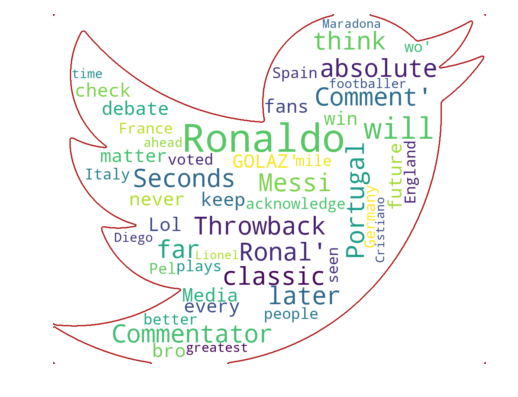

-------------Neutral tweets wordcloud Ronaldo---------------------- 




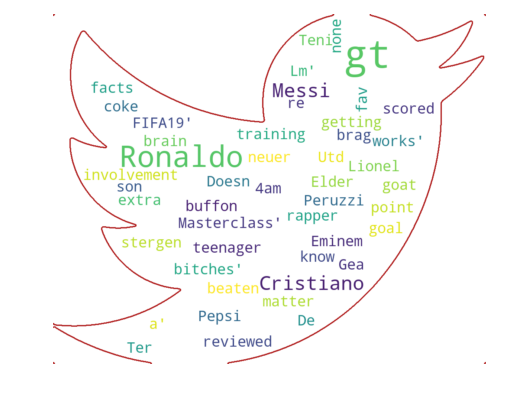

-------------Negative tweets wordcloud Ronaldo---------------------- 




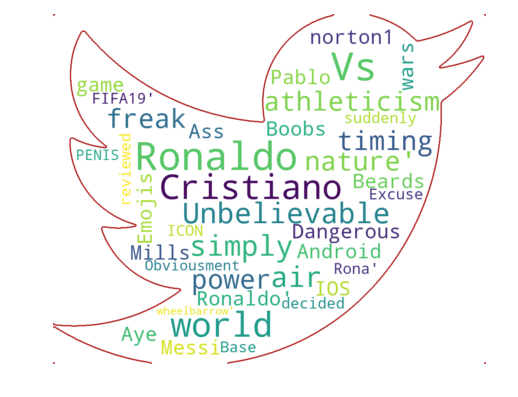

In [35]:
print("-------------Positive tweets wordcloud Ronaldo---------------------- \n\n")
#taking the positive sentiments of Ronaldo
positive_ronaldo_wc = cr7_en_df[cr7_en_df["analysed_sentiment"] == 'Positive']
#calling the function to make wordcloud
tweet_wordcloud(positive_ronaldo_wc,"processed_tweet",'twitter_mask.png')
print("-------------Neutral tweets wordcloud Ronaldo---------------------- \n\n")

#taking the neutral sentiments of Ronaldo
neutral_ronaldo_wc = cr7_en_df[cr7_en_df["analysed_sentiment"] == 'Neutral']
#calling the function to make wordcloud
tweet_wordcloud(neutral_ronaldo_wc,"processed_tweet",'twitter_mask.png')
print("-------------Negative tweets wordcloud Ronaldo---------------------- \n\n")

#taking the negative sentiments of Ronaldo
negative_ronaldo_wc = cr7_en_df[cr7_en_df["analysed_sentiment"] == 'Negative']
#calling the function to make wordcloud
tweet_wordcloud(negative_ronaldo_wc,"processed_tweet",'twitter_mask.png')

**Analysis**


1.   In Positive word cloud we can see words like footballer, classic, absolute
2.   In Negative word cloud we can see words like Dangereous, nature 



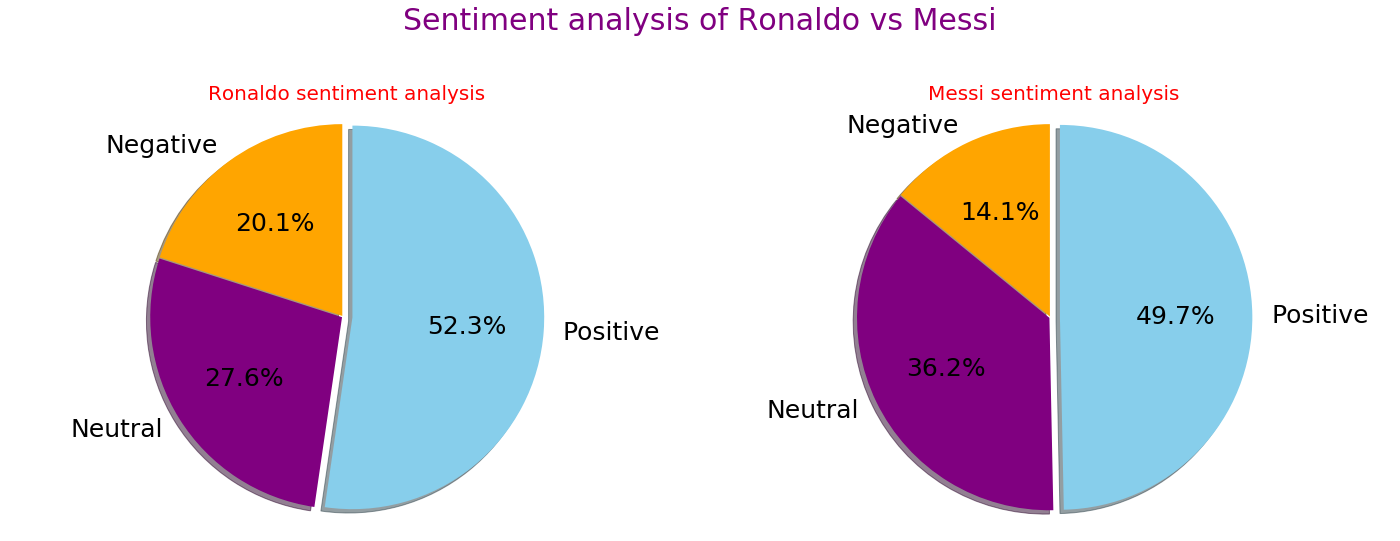

In [42]:
cr7_count = cr7_en_df.analysed_sentiment.value_counts().sort_index()
lm10_count = lm10_en_df.analysed_sentiment.value_counts().sort_index()
matplotlib.rcParams['font.size'] = 25.0
explode = (0.005, 0.005, 0.05)
fig, (ax1, ax2) = plt.subplots(1, 2 , figsize=(20,7))
fig.suptitle("Sentiment analysis of Ronaldo vs Messi", fontsize=30, color="purple",y = 1.1)
ax1.pie(cr7_count.values, explode=explode,colors = ["Orange","purple","skyblue"], labels=cr7_count.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Ronaldo sentiment analysis", color = "Red",fontsize=20)
ax1.axis('equal') 
ax2.pie(lm10_count.values, explode=explode,colors = ["Orange","purple","skyblue"], labels=lm10_count.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title("Messi sentiment analysis", color = "Red",fontsize=20)
ax2.axis('equal')  

plt.tight_layout()
plt.show()


**Analysis**


1.   Ronaldo has more positive tweets when compared to messi and also has more negative tweets then messi which also shows the popularity of Ronaldo in Social media twitter.
2.   Messi has more neutral tweets then Ronaldo and the neutral tweets to negative tweets ratio is higher than Ronaldo



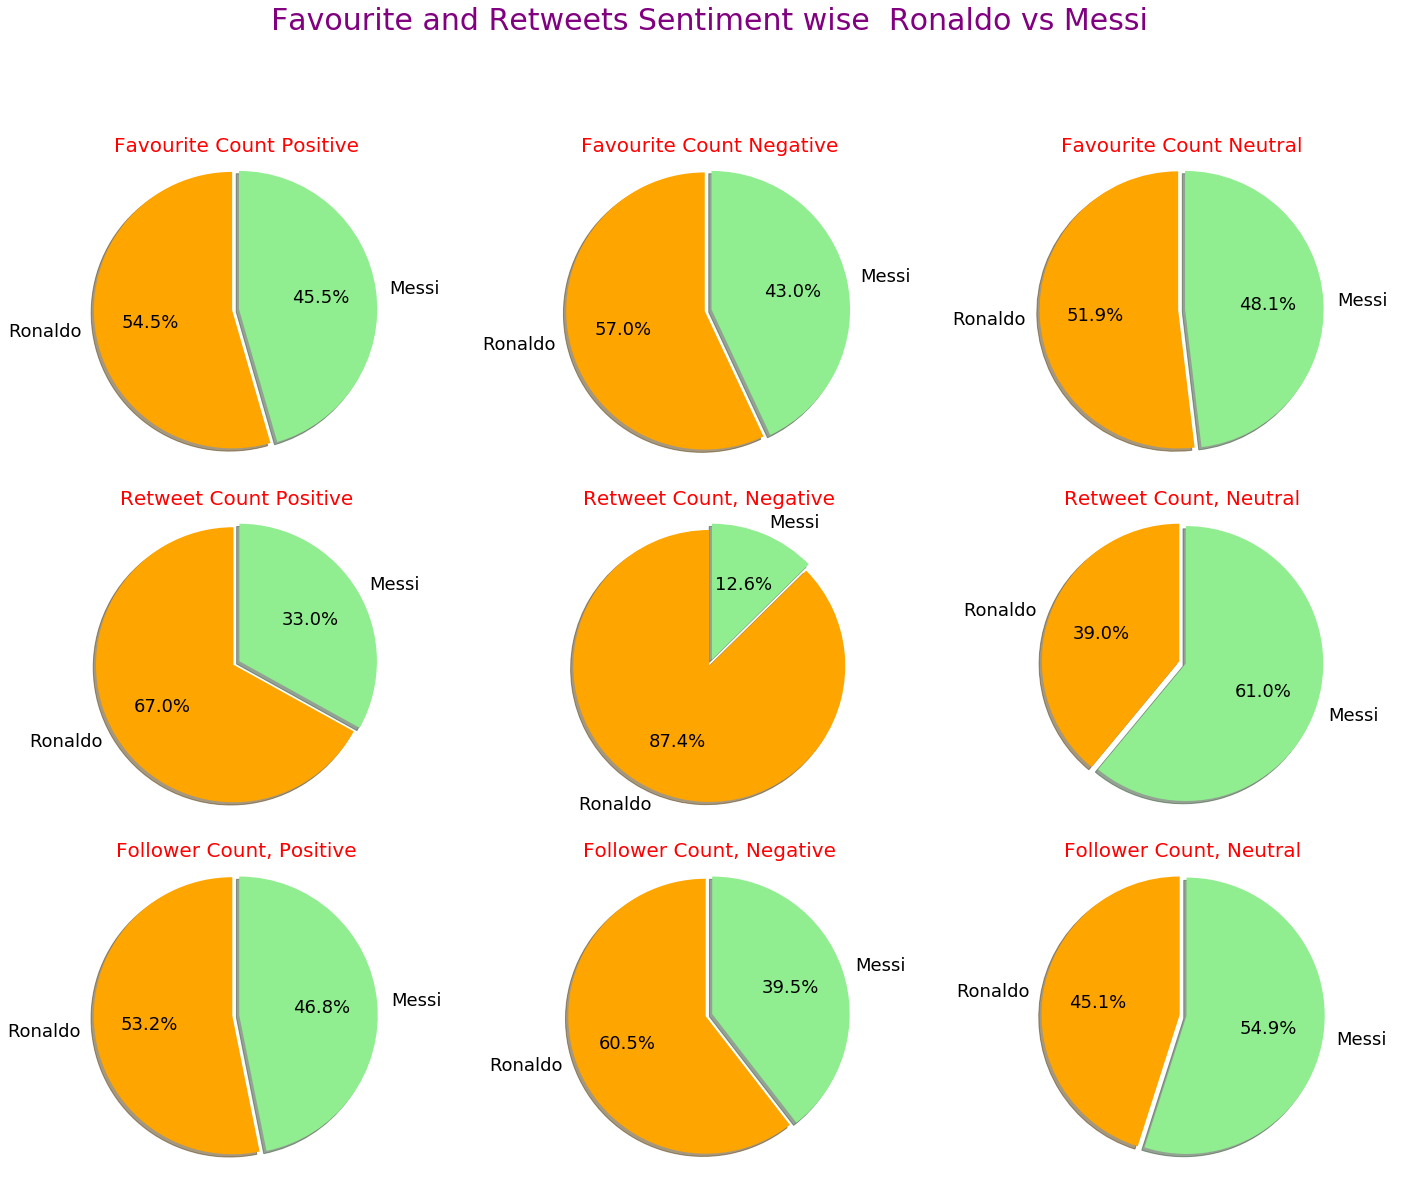

In [38]:
#filtering dataframe based on sentiment
cr7_df_pos = cr7_en_df[cr7_en_df["analysed_sentiment"] == "Positive"]
lm10_df_pos = lm10_en_df[lm10_en_df["analysed_sentiment"] == "Positive"]
cr7_df_neg = cr7_en_df[cr7_en_df["analysed_sentiment"] == "Negative"]
lm10_df_neg = lm10_en_df[lm10_en_df["analysed_sentiment"] == "Negative"]
cr7_df_neu = cr7_en_df[cr7_en_df["analysed_sentiment"] == "Neutral"]
lm10_df_neu = lm10_en_df[lm10_en_df["analysed_sentiment"] == "Neutral"]
#sum of fav_counts
cr7_df_pos_fav = cr7_df_pos.loc[cr7_df_pos["favorite_count"] >0]["favorite_count"].count()
lm10_df_pos_fav = lm10_df_pos.loc[lm10_df_pos["favorite_count"] >0]["favorite_count"].count()
cr7_df_neg_fav = cr7_df_neg.loc[cr7_df_neg["favorite_count"] >0]["favorite_count"].count()
lm10_df_neg_fav = lm10_df_neg.loc[lm10_df_neg["favorite_count"] >0]["favorite_count"].count()
cr7_df_neu_fav = cr7_df_neu.loc[cr7_df_neu["favorite_count"] >0]["favorite_count"].count()
lm10_df_neu_fav = lm10_df_neu.loc[lm10_df_neu["favorite_count"] >0]["favorite_count"].count()

#sum of retweet counts
cr7_df_pos_ret = cr7_df_pos.loc[cr7_df_pos["retweet_count"] != 0, 'retweet_count'].sum()
lm10_df_pos_ret = lm10_df_pos.loc[lm10_df_pos["retweet_count"] != 0, 'retweet_count'].sum()
cr7_df_neg_ret = cr7_df_neg.loc[cr7_df_neg["retweet_count"] != 0, 'retweet_count'].sum()
lm10_df_neg_ret = lm10_df_neg.loc[lm10_df_neg["retweet_count"] != 0, 'retweet_count'].sum()
cr7_df_neu_ret = cr7_df_neu.loc[cr7_df_neu["retweet_count"] != 0, 'retweet_count'].sum()
lm10_df_neu_ret = lm10_df_neu.loc[lm10_df_neu["retweet_count"] != 0, 'retweet_count'].sum()

#sum of followers
cr7_df_pos_fol = cr7_df_pos.loc[cr7_df_pos["followers_count"] >0]["followers_count"].count()
lm10_df_pos_fol = lm10_df_pos.loc[lm10_df_pos["followers_count"] >0]["followers_count"].count()
cr7_df_neg_fol = cr7_df_neg.loc[cr7_df_neg["followers_count"] >0]["followers_count"].count()
lm10_df_neg_fol = lm10_df_neg.loc[lm10_df_neg["followers_count"] >0]["followers_count"].count()
cr7_df_neu_fol = cr7_df_neu.loc[cr7_df_neu["followers_count"] >0]["followers_count"].count()
lm10_df_neu_fol = lm10_df_neu.loc[lm10_df_neu["followers_count"] >0]["followers_count"].count()

labels = ["Ronaldo", "Messi"]


matplotlib.rcParams['font.size'] = 20.0
explode = (0.0, 0.05) 

fig, [[ax1, ax2,ax3], [ax4,ax5, ax6],[ax7,ax8,ax9]] = plt.subplots(3, 3 , figsize=(20,15))
fig.suptitle("Favourite and Retweets Sentiment wise  Ronaldo vs Messi", fontsize=30, color="Purple", y = 1.1)

ax1.pie([cr7_df_pos_fav, lm10_df_pos_fav], explode=explode,colors = ["Orange","lightgreen","skyblue"],textprops={'fontsize': 18},  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title("Favourite Count Positive",color = "Red",fontsize=20)
ax1.axis('equal') 

ax2.pie([cr7_df_neg_fav, lm10_df_neg_fav], explode=explode,colors = ["Orange","lightgreen","skyblue"],textprops={'fontsize': 18},   labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title("Favourite Count Negative",color = "Red",fontsize=20)
ax2.axis('equal') 

ax3.pie([cr7_df_neu_fav, lm10_df_neu_fav], explode=explode,colors = ["Orange","lightgreen","skyblue"],textprops={'fontsize': 18},   labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.set_title("Favourite Count Neutral",color = "Red",fontsize=20)
ax3.axis('equal') 

ax4.pie([cr7_df_pos_ret,lm10_df_pos_ret], explode=explode,colors = ["Orange","lightgreen","skyblue"], textprops={'fontsize': 18},  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax4.set_title("Retweet Count Positive",color = "Red",fontsize=20)
ax4.axis('equal')

ax5.pie([cr7_df_neg_ret,lm10_df_neg_ret], explode=explode,colors = ["Orange","lightgreen","skyblue"], textprops={'fontsize': 18},  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax5.set_title("Retweet Count, Negative",color = "Red",fontsize=20)
ax5.axis('equal')


ax6.pie([cr7_df_neu_ret,lm10_df_neu_ret], explode=explode,colors = ["Orange","lightgreen","skyblue"],textprops={'fontsize': 18},   labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax6.set_title("Retweet Count, Neutral",color = "Red",fontsize=20)
ax6.axis('equal')

ax7.pie([cr7_df_pos_fol,lm10_df_pos_fol], explode=explode,colors = ["Orange","lightgreen","skyblue"], textprops={'fontsize': 18},  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax7.set_title("Follower Count, Positive",color = "Red",fontsize=20)
ax7.axis('equal')

ax9.pie([cr7_df_neu_fol,lm10_df_neu_fol], explode=explode,colors = ["Orange","lightgreen","skyblue"], textprops={'fontsize': 18},  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax9.set_title("Follower Count, Neutral",color = "Red",fontsize=20)
ax9.axis('equal')

ax8.pie([cr7_df_neg_fol,lm10_df_neg_fol], explode=explode,colors = ["Orange","lightgreen","skyblue"], textprops={'fontsize': 18},  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax8.set_title("Follower Count, Negative",color = "Red",fontsize=20)
ax8.axis('equal')


plt.tight_layout()
plt.show()

**Analysis**


1.   Ronaldo has higher proportion of negative as well as positive sentiment in all the cases compared above
2.   Messi has higher neutral proportion in case of Retweet and follower count



**Analysis of Popular tweets**
Note - Considered retweet count is >= 150

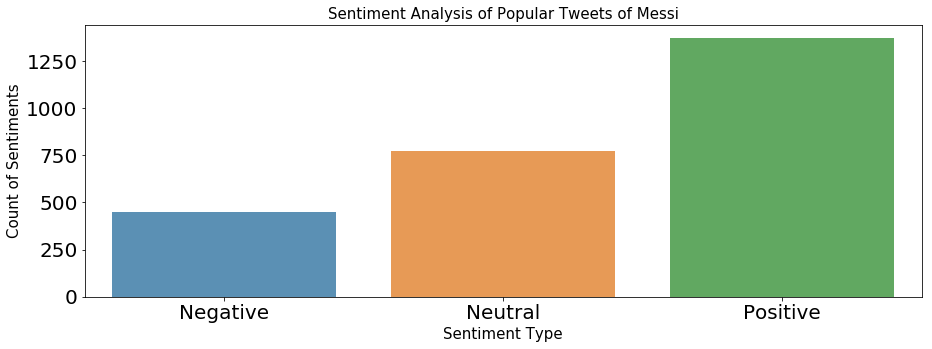

In [39]:
df_popular_messi = lm10_en_df[lm10_en_df['retweet_count'] >= 150]
# Plotting a bar graph of the number of sentiments of each type
# in the column 'analysed_sentiment'
senti_count  = df_popular_messi["analysed_sentiment"].value_counts()
senti_count = senti_count[:10,]
plt.figure(figsize=(15,5))
senti_count.sort_index(inplace=True)
sns.barplot(senti_count.index, senti_count.values,  alpha=0.8)
plt.title('Sentiment Analysis of Popular Tweets of Messi',fontsize=15)
plt.ylabel('Count of Sentiments', fontsize=15)
plt.xlabel('Sentiment Type', fontsize=15)
plt.show()

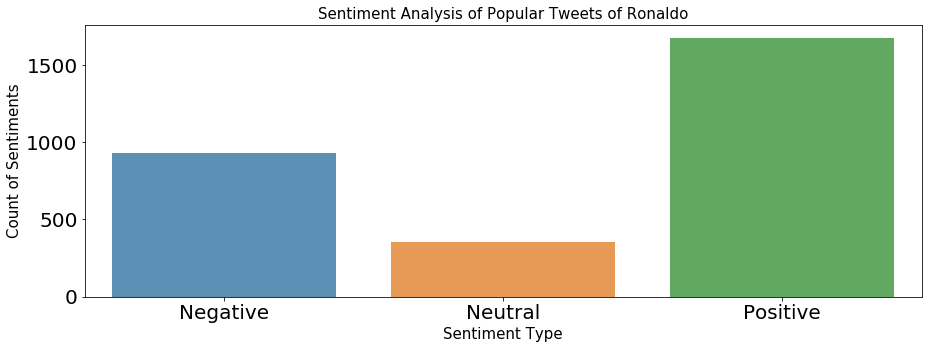

In [40]:
df_popular_ronaldo = cr7_en_df[cr7_en_df['retweet_count'] >= 150]
# Plotting a bar graph of the number of sentiments of each type
# in the column 'analysed_sentiment'
senti_count  = df_popular_ronaldo["analysed_sentiment"].value_counts()
senti_count = senti_count[:10,]
plt.figure(figsize=(15,5))
senti_count.sort_index(inplace=True)
sns.barplot(senti_count.index, senti_count.values,  alpha=0.8)
plt.title('Sentiment Analysis of Popular Tweets of Ronaldo',fontsize=15)
plt.ylabel('Count of Sentiments', fontsize=15)
plt.xlabel('Sentiment Type', fontsize=15)
plt.show()

**Analysis**


1.   Ronaldo has higher proportion of Positive sentiment in the catagory of popular retweets as compared to Messi
2.   Ronaldo has higher proportion of Negative sentiment in the catagory of popular retweets as compared to Messi
3.   Messi has more higher proportion of Neutral sentiment in the catagory of popular retweets as compared to Ronaldo



# Conclusion

1.  Ronaldo is more popular then Messi on Twitter
2.   Ronaldo has more positive sentiment tweets as well as more negative sentiment tweets probably because of his popularity and also due to his straight forward attitude he has more lovers as well as haters
3. Messi has more neutral tweets to his name then Ronaldo

